# Predicting the Sale Price of unit area of Real Estate properties

## 1. Problem Definition
* How well can we predict the future sale price of a real estate property, given its characteristics and previous examples of similar properties?

## 2. Data
The data was downloaded from Kaggle: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?datasetId=88705&sortBy=voteCount

## 3. Evaluation
The evaluation metric used is root mean squared error (rmse) between the actual and predicted prices.

## 4. Features
The features used can be seen here: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?datasetId=88705&sortBy=voteCount

In [75]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import math

In [2]:
# Import data
data = pd.read_csv('archive/Real estate.csv',
                  low_memory=False)

data = pd.DataFrame(data)

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Exploratory Data Analysis

In [4]:
data = data.drop('No', axis=1)

In [5]:
data['X1 transaction date'].dtype

dtype('float64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [7]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
data.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

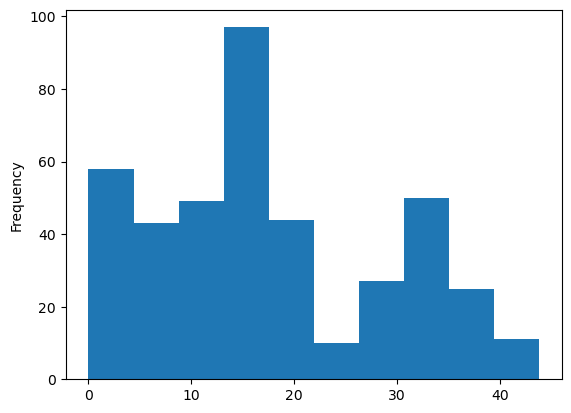

In [9]:
data['X2 house age'].plot.hist();

In [10]:
data['X2 house age'].unique

<bound method Series.unique of 0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64>

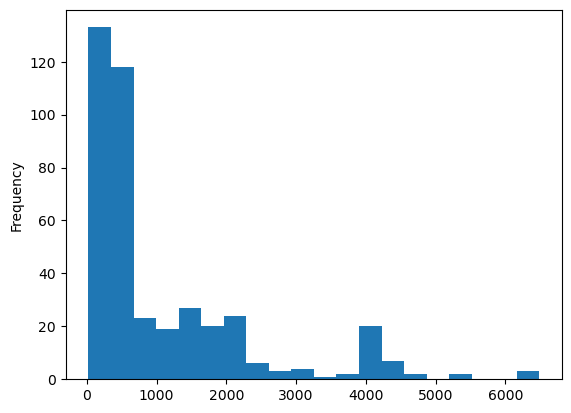

In [11]:
data['X3 distance to the nearest MRT station'].plot.hist(bins=20);

Let's see some features plotted with price

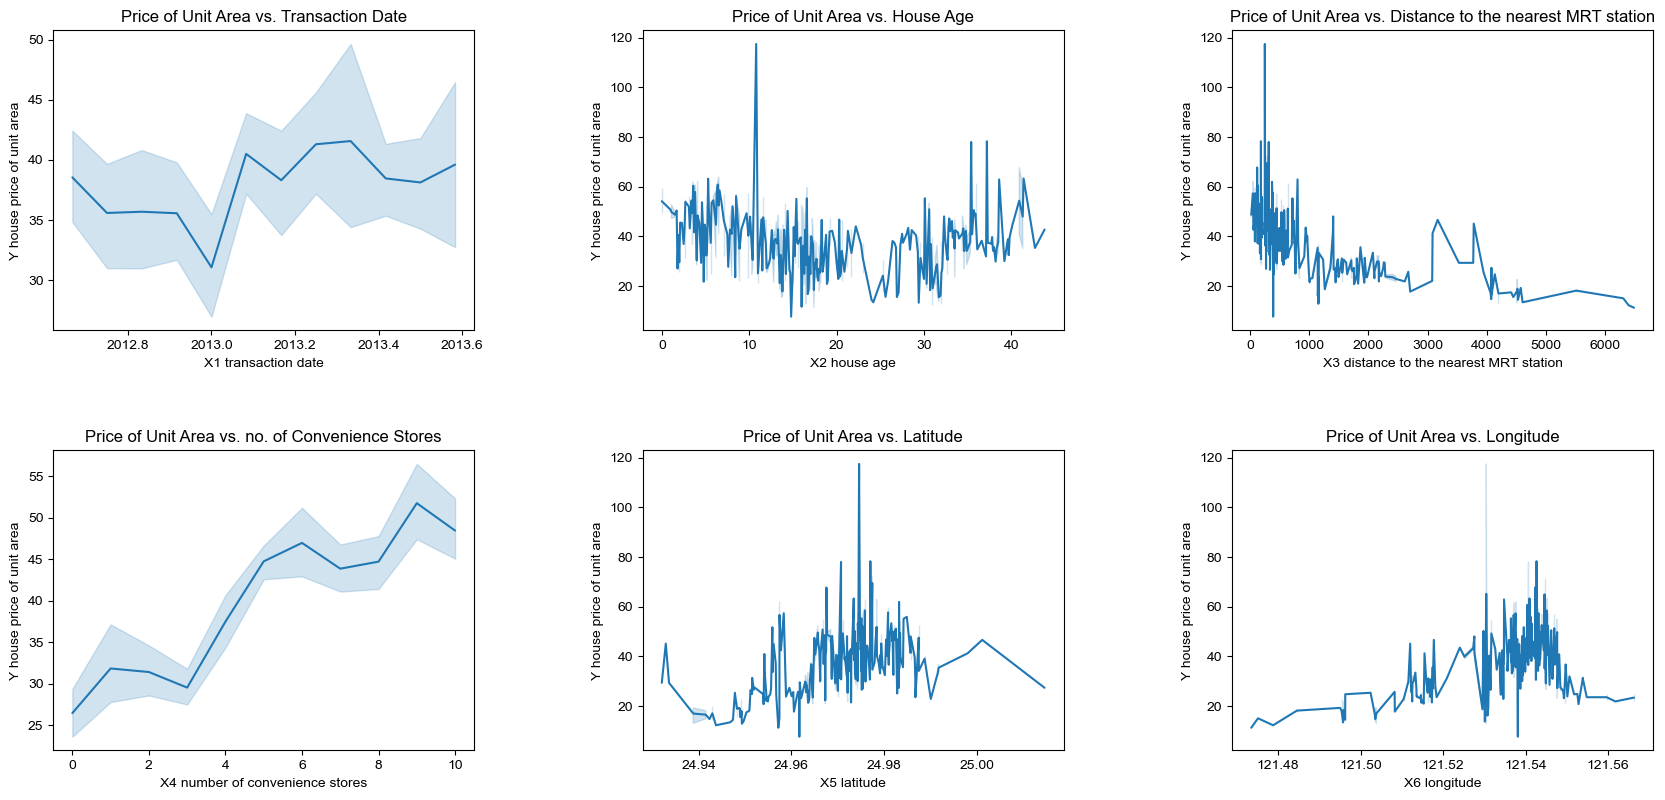

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=data, x="X1 transaction date", y="Y house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=data, x="X2 house age", y="Y house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=data, x="X3 distance to the nearest MRT station", y="Y house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=data, x="X4 number of convenience stores", y="Y house price of unit area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=data, x="X5 latitude", y="Y house price of unit area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=data, x="X6 longitude", y="Y house price of unit area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show();

* The closer the house is to an MRT station the higher the price of the unit is.
* The higher the number of the convenience stores the higher the price of the house (proportional).
* House age is not proportional to the price, with one clear outlier.

In [13]:
data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


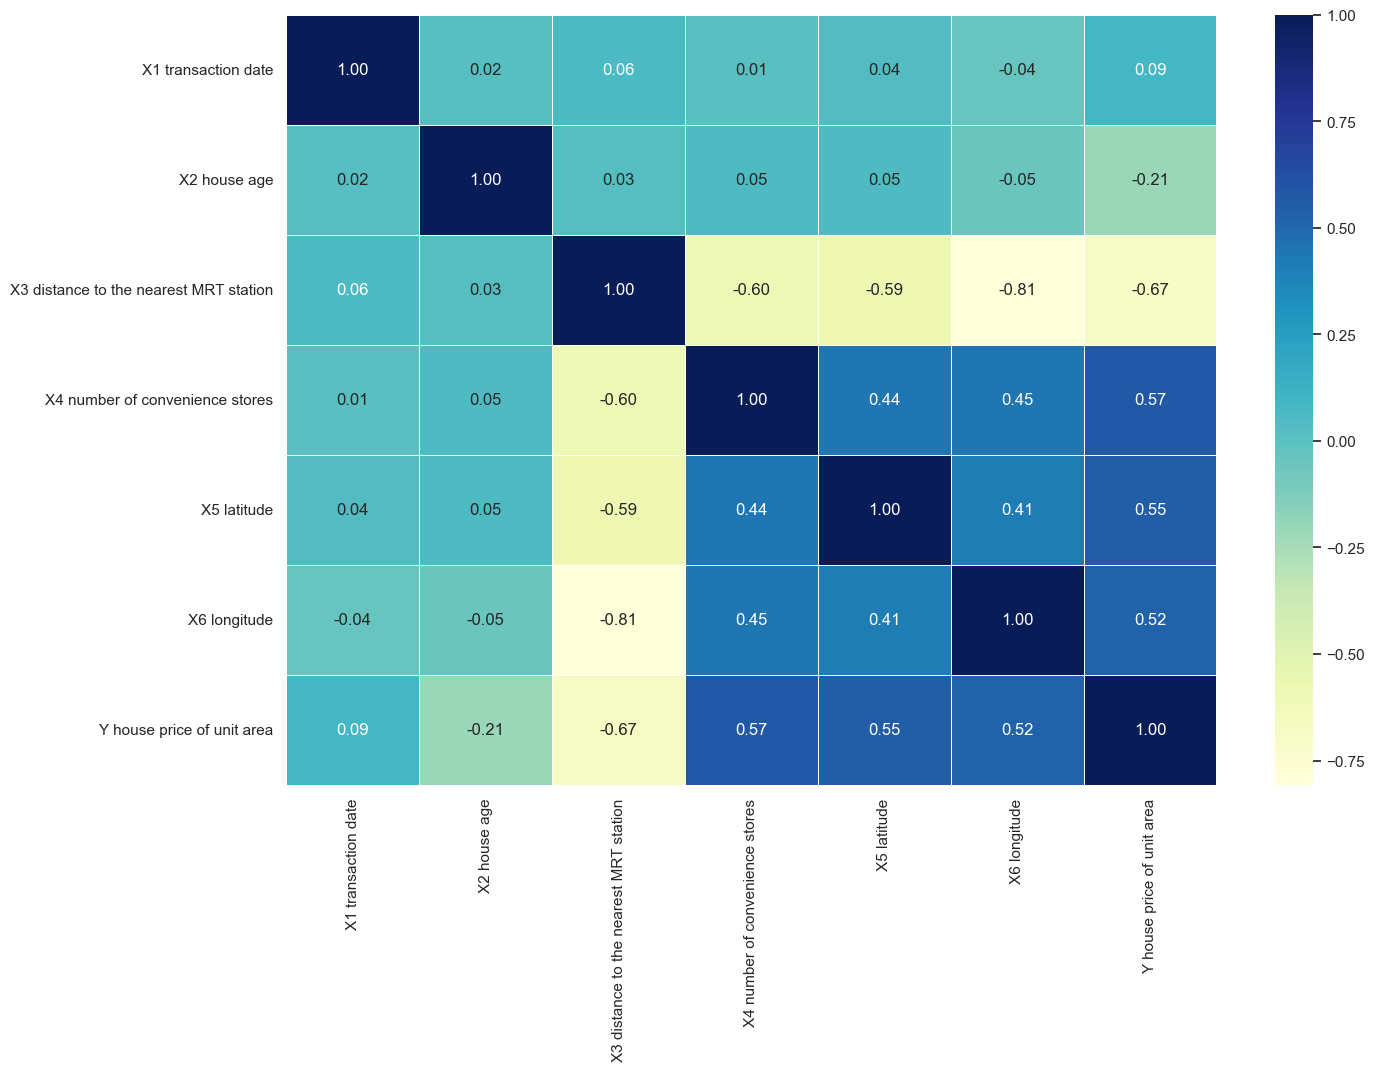

In [14]:
# Let's make our correlation matrix a littile prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

We can see that X3, X4, X5, and X6 has the most impact on the target variable.

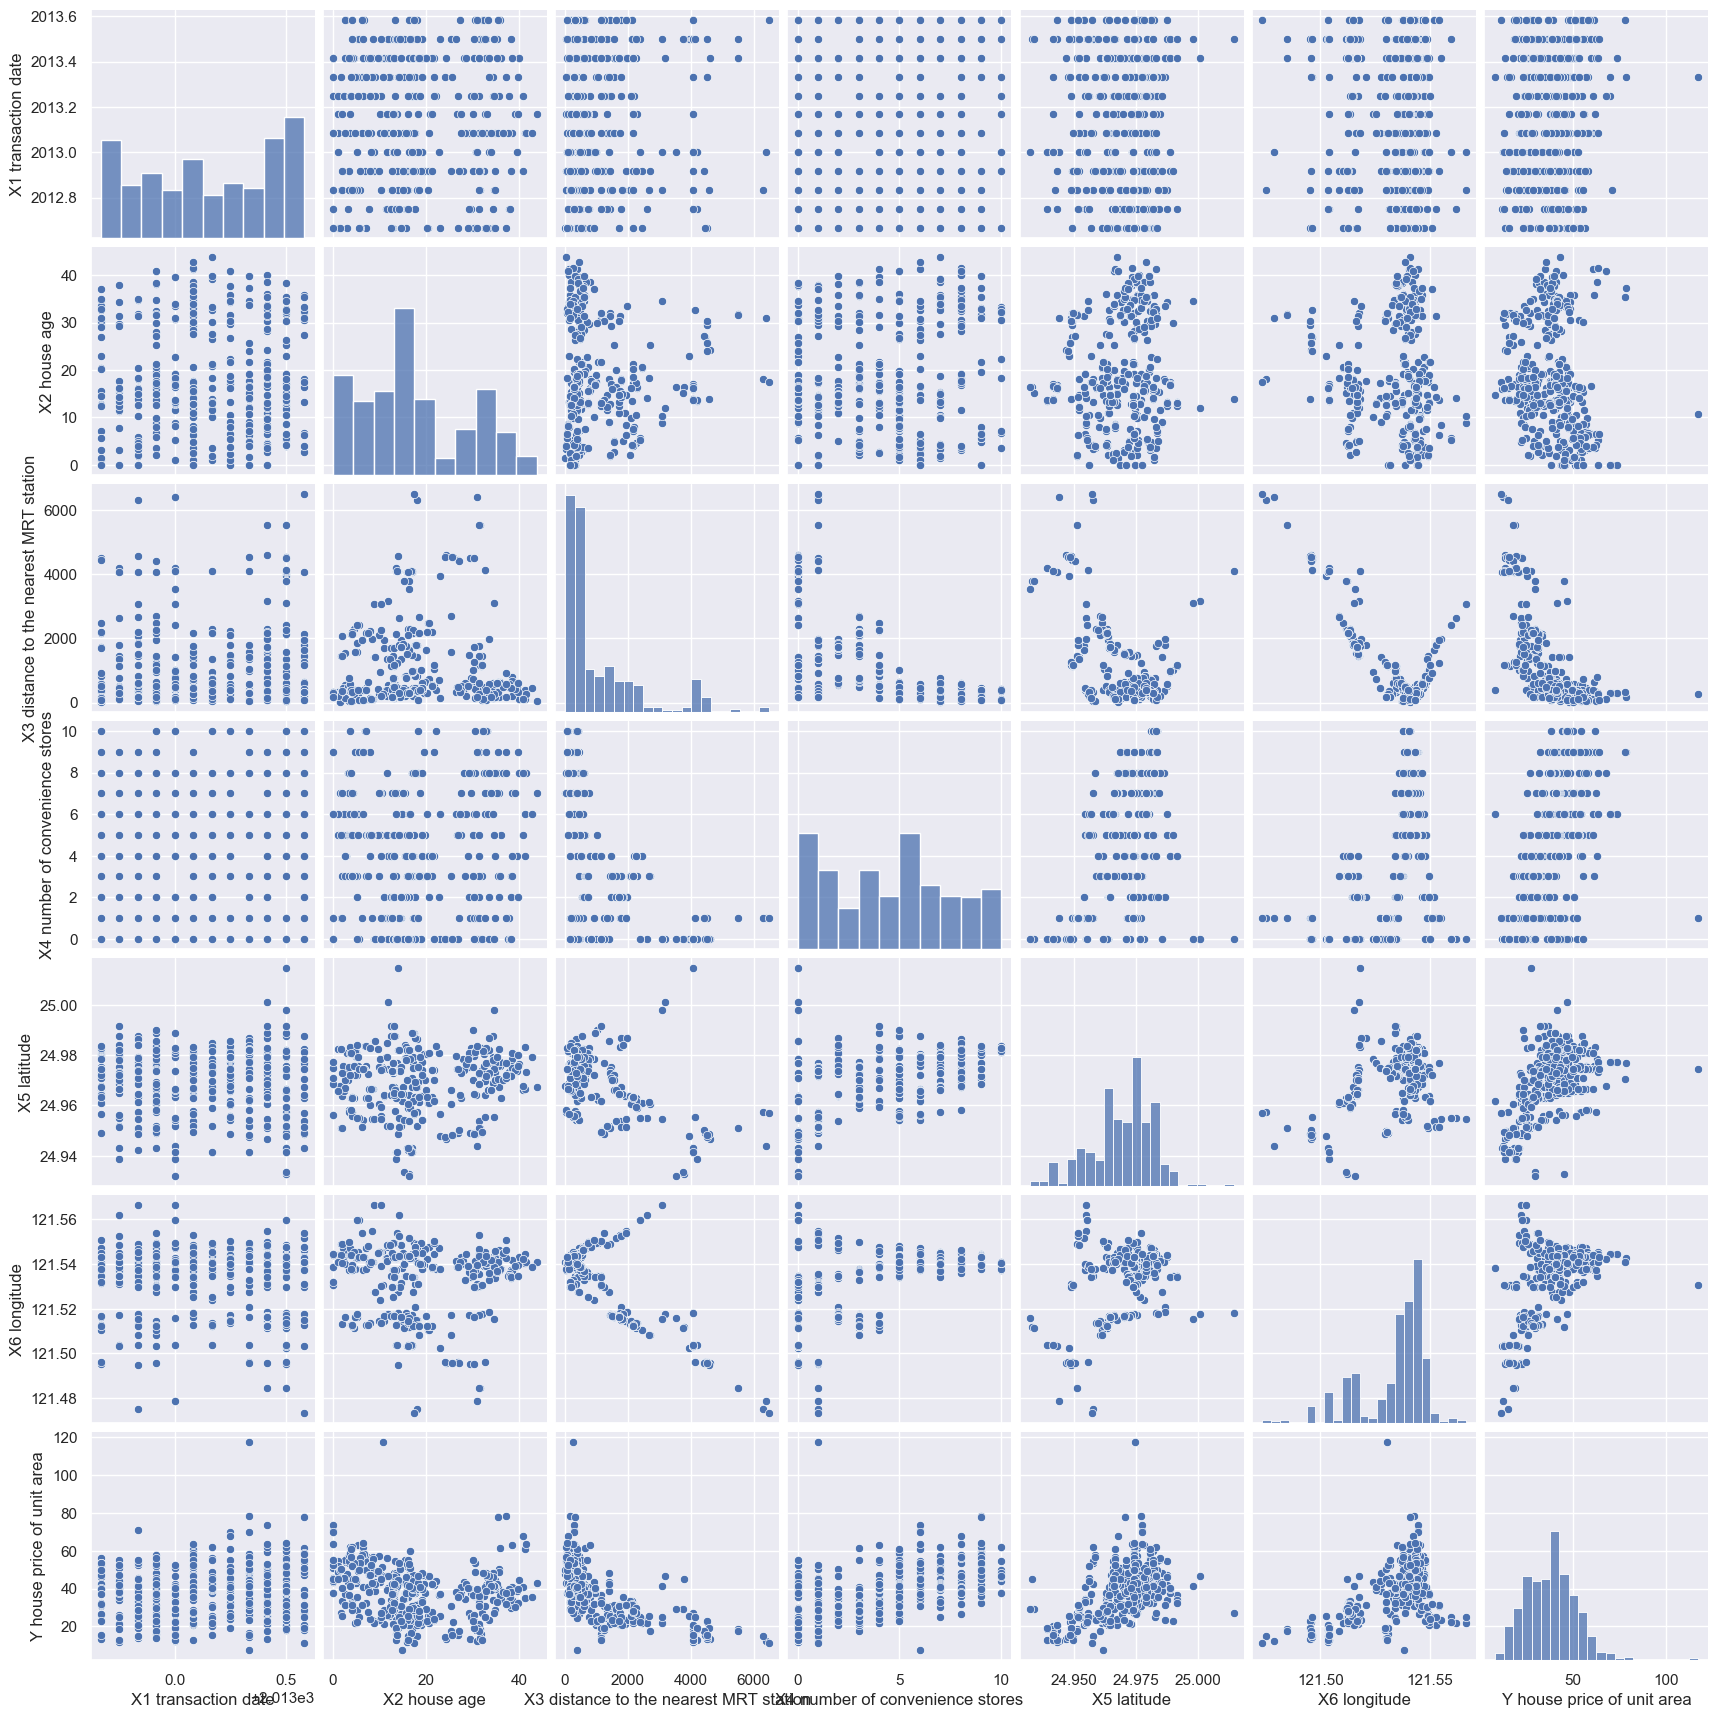

In [15]:
sns.pairplot(data)

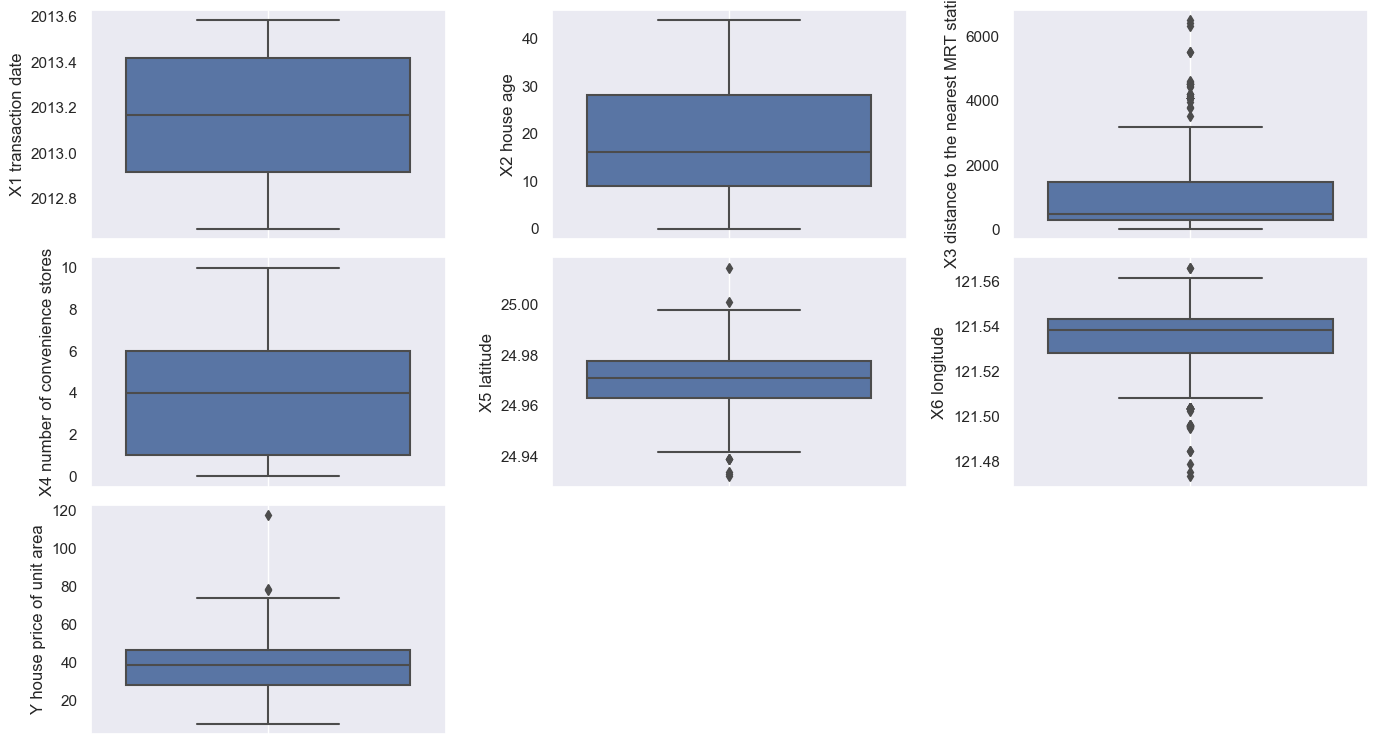

In [16]:
# Check outliers 
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

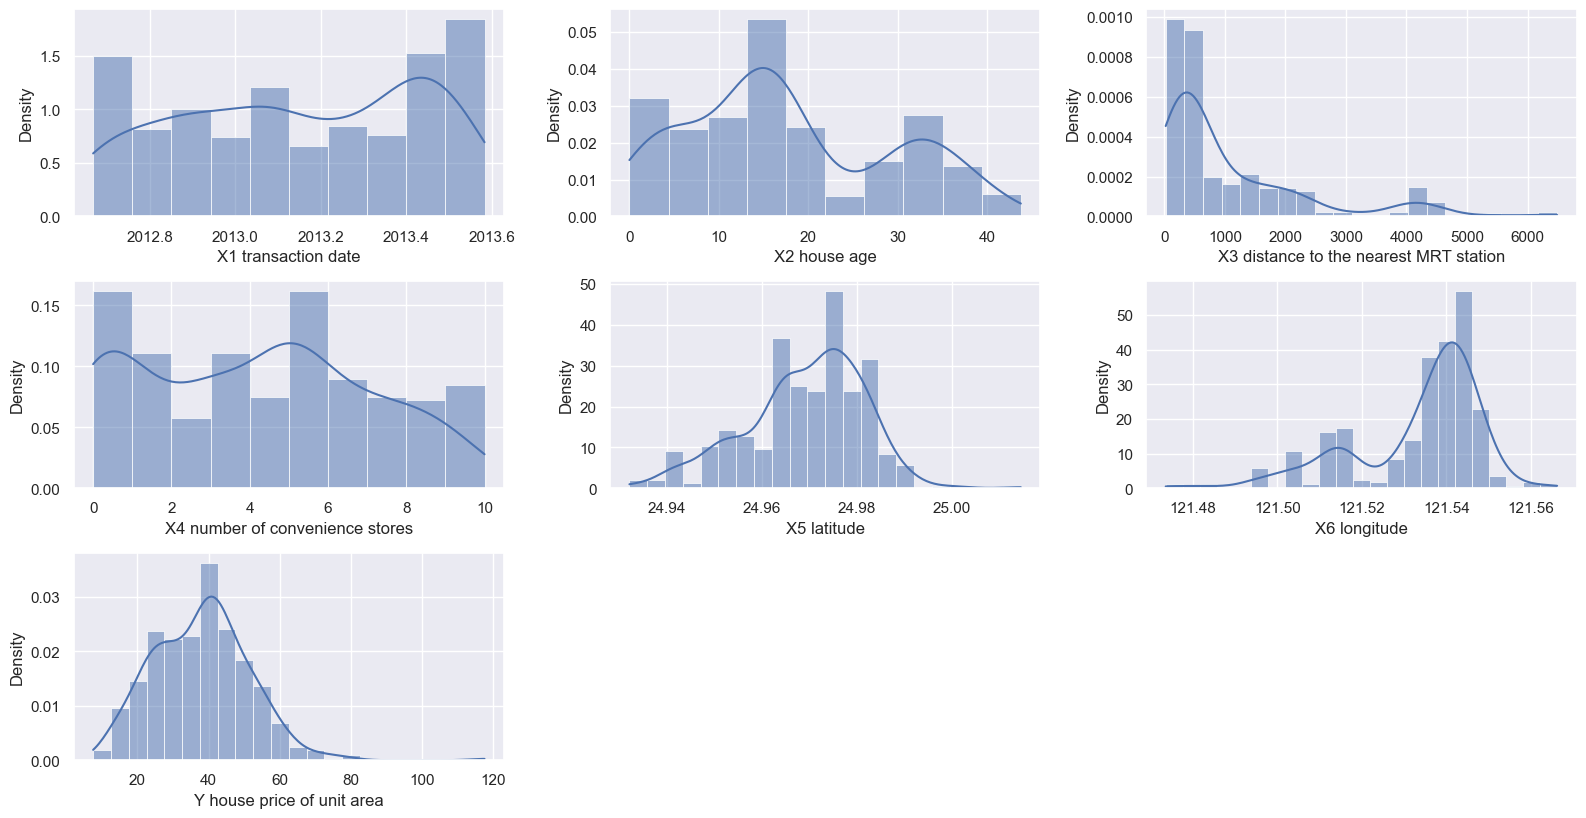

In [17]:
# Distributions of data
# Check outliers 
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(data):
    plt.subplot(6,3,index+1)
    sns.histplot(data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

### Drop outliers

* House price values
* Longitude
* Distance to the nearest MRT station

In [83]:
data = data[data['Y house price of unit area']<80]
data = data[data['X6 longitude']>121.5]
data = data[data['X3 distance to the nearest MRT station']<3000]

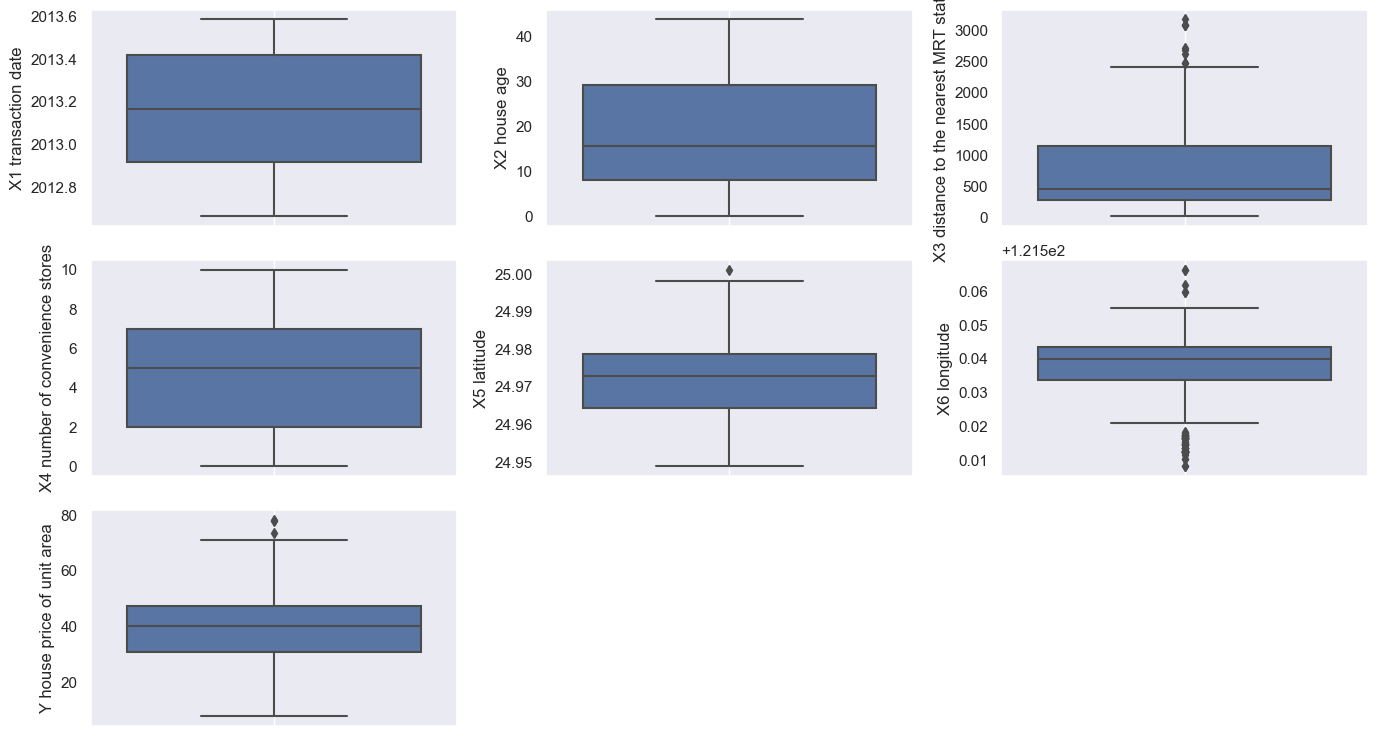

In [19]:
# Check again for the outliers
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

It looks much better now

### Convert transaction date to date

In [20]:
def to_date(data):
    # STEP 1: Convert transaction date to day, month and year columns
    # Create date column with `transaction date` as a date
    data['date'] = pd.to_datetime(data['X1 transaction date'], format='%Y')

    # Create year column
    data['year'] = pd.DatetimeIndex(data['date']).year

    # Create month column by extracting the decimal part of `transaction date` and multiplying it by 12
    data['month'], data['year1'] = data['X1 transaction date'].apply(lambda x: math.modf(x)).str
    data['month'] = data['month']*12

    # Create day column by extracting the decimal part of int
    data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str

    # Convert month to int
    data['month'] = (data['month']).astype(int)

    # Multiply `day` column by 30 + 1 to convert it to days
    data['day'] = (data['day']*30+1).astype(int)

    # Drop unnecessary columns
    data = data.drop(['X1 transaction date', 'date', 'year1'], axis=1, inplace=True)

In [21]:
to_date(data)
data.head()

C:\Users\Kypri\AppData\Local\Temp\ipykernel_33340\1046886306.py:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['month'], data['year1'] = data['X1 transaction date'].apply(lambda x: math.modf(x)).str
C:\Users\Kypri\AppData\Local\Temp\ipykernel_33340\1046886306.py:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30


### Prepare the data

In [84]:
# Prepare the X and y data
X = data.drop('Y house price of unit area', axis=1)
y = data['Y house price of unit area']

In [85]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Modelling and Evaluation

In [86]:
# Create a function to try 3 different models
models = {'Lasso': Lasso(),
          'Random Forest': RandomForestRegressor(),
          'Ridge': Ridge(),
          'Elastic Net': ElasticNet(),
          'Linear Regression': LinearRegression()}

def fit_score_model(models, X_train, y_train, X_test, y_test):
    '''
    Fit models and then evaluates them
    '''
    np.random.seed(42)
    
    model_scores = {}
    cv_mean_squared_error = {}
    cv_mean_absolute_error = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        cv_mean_squared_error[name] = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_mean_absolute_error[name] = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
        
    return model_scores, cv_mean_squared_error, cv_mean_absolute_error


In [87]:
# Try the 3 models
fit_score_model(models, X_train, y_train, X_test, y_test)

({'Lasso': 0.5243277186172315,
  'Random Forest': 0.7064484230853558,
  'Ridge': 0.539905579062512,
  'Elastic Net': 0.5256292367342021,
  'Linear Regression': 0.5880991507491191},
 {'Lasso': array([-49.95503424, -87.13728602, -48.39804717, -77.54917482,
         -48.64661856]),
  'Random Forest': array([-39.12707718, -55.2838487 , -41.68665637, -52.20252074,
         -31.79960871]),
  'Ridge': array([-46.27636796, -88.71056555, -47.67303104, -73.13596926,
         -47.80489849]),
  'Elastic Net': array([-49.78746313, -87.14456964, -48.24428058, -77.80757515,
         -48.46549568]),
  'Linear Regression': array([-40.63935863, -78.87041352, -41.19229203, -64.75281508,
         -53.12002254])},
 {'Lasso': array([-5.27634225, -6.52308236, -5.03278734, -6.59219811, -5.29610205]),
  'Random Forest': array([-4.19666184, -5.16387356, -4.68111364, -4.81566486, -4.16904318]),
  'Ridge': array([-5.13799803, -6.55110017, -4.9183572 , -6.52320266, -5.25002533]),
  'Elastic Net': array([-5.2780090

In [88]:
# Choosing the best model to investigate more
model = RandomForestRegressor()

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_preds)
mse, mae, rmse

(56.135298400039225, 5.041973682539684, 7.492349324480221)

In [89]:
# Choosing the best model to investigate more
model_lin = LinearRegression()

model_lin.fit(X_train, y_train)
y_preds_lin = model_lin.predict(X_test)

mse = mean_squared_error(y_test, y_preds_lin)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_preds_lin)
mse, mae, rmse

(75.2588252208299, 5.931509218089922, 8.675184448807409)

In [90]:
# Let's try hyperparameter tuning on the best one
grid = {'n_estimators':[10,100,1000],
        'max_depth':[None,5,10,20],
        'min_samples_leaf':[1,5,10,20]}

grid_search_rf = GridSearchCV(RandomForestRegressor(),
                              grid,
                              n_jobs=-1,
                              cv=5,
                              verbose=True)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'n_estimators': [10, 100, 1000]},
             verbose=True)

In [91]:
grid_search_rf.best_params_
y_preds = grid_search_rf.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_preds)
mse, mae, rmse

(56.74097089655514, 5.0521611535019, 7.532660280176927)

In [92]:
# Let's try hyperparameter tuning on Ridge now as Linear Regression has no parameters
grid = {'alpha': [0.01, 0.1, 1, 10],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']}

grid_search_ridge = GridSearchCV(Ridge(),
                              grid,
                              n_jobs=-1,
                              cv=5,
                              verbose=True)

grid_search_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']},
             verbose=True)

In [93]:
grid_search_ridge.best_params_
y_preds = grid_search_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_preds)
rmse_ridge = np.sqrt(mse)
mae_ridge = mean_absolute_error(y_test, y_preds)
r2_ridge = r2_score(y_test,y_preds)
mse_ridge, mae_ridge, rmse_ridge, r2_ridge

(76.77802450702889, 5.9933964681882825, 7.532660280176927, 0.579784385346782)

Text(0, 0.5, 'Predicted Values')

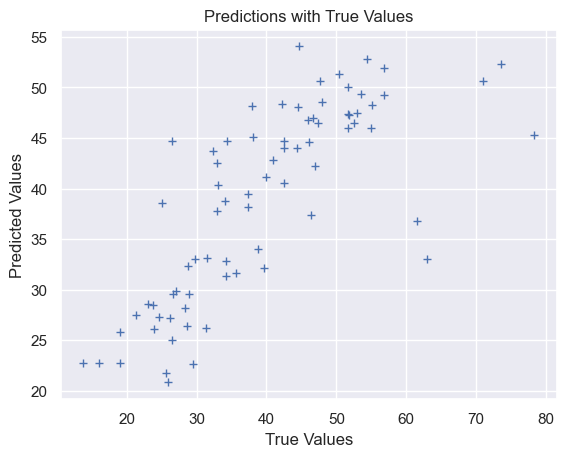

In [94]:
plt.plot(y_test,y_preds,'+')
plt.title('Predictions with True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

## Random Forest is the best one to try to tune even more

We will evaluate on root mean squared error as it is a regression problem and we want the lowest error margins

In [62]:
grid = {'n_estimators':[10,100],
        'max_depth':[10,100],
        'min_samples_leaf':[2,3,4],
        'min_samples_split':[2,3,4],
        'max_features':[5,10]}

grid_search_rf = GridSearchCV(RandomForestRegressor(),
                              grid,
                              n_jobs=-1,
                              cv=5,
                              verbose=True,
                              scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train, y_train)
y_preds = grid_search_rf.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
mse, mae

Fitting 5 folds for each of 72 candidates, totalling 360 fits


(48.732289558435994, 4.544148150679728)

In [63]:
grid_search_rf.best_params_

{'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [64]:
rmse_rf = np.sqrt(mse)
rmse_rf

6.980851635612663

In [77]:
y_preds = grid_search_rf.predict(X_test)
r2_rf = r2_score(y_test,y_preds)
r2_rf

0.6588628158496985

### Try Catboost

In [41]:
import catboost
from catboost import CatBoostRegressor

In [42]:
model_cat = CatBoostRegressor(depth=8,
                               l2_leaf_reg=1,
                               learning_rate=None,
                               random_strength=1,
                               iterations=3000)

model_cat.fit(X_train, y_train)

y_preds = model_cat.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
mse, mae

0:	learn: 11.7407494	total: 145ms	remaining: 7m 13s
1:	learn: 11.5068080	total: 147ms	remaining: 3m 40s
2:	learn: 11.3073684	total: 149ms	remaining: 2m 29s
3:	learn: 11.1080894	total: 152ms	remaining: 1m 53s
4:	learn: 10.9262191	total: 154ms	remaining: 1m 32s
5:	learn: 10.7421877	total: 156ms	remaining: 1m 17s
6:	learn: 10.5483995	total: 159ms	remaining: 1m 7s
7:	learn: 10.3592369	total: 161ms	remaining: 1m
8:	learn: 10.1738109	total: 164ms	remaining: 54.4s
9:	learn: 9.9902958	total: 166ms	remaining: 49.6s
10:	learn: 9.8385151	total: 168ms	remaining: 45.7s
11:	learn: 9.6632996	total: 171ms	remaining: 42.5s
12:	learn: 9.5294770	total: 171ms	remaining: 39.4s
13:	learn: 9.3995517	total: 173ms	remaining: 36.9s
14:	learn: 9.2589959	total: 175ms	remaining: 34.9s
15:	learn: 9.1023687	total: 178ms	remaining: 33.2s
16:	learn: 8.9585644	total: 180ms	remaining: 31.7s
17:	learn: 8.8368648	total: 183ms	remaining: 30.3s
18:	learn: 8.7079386	total: 185ms	remaining: 29.1s
19:	learn: 8.5804476	total: 1

237:	learn: 2.4819011	total: 729ms	remaining: 8.46s
238:	learn: 2.4750179	total: 732ms	remaining: 8.46s
239:	learn: 2.4682950	total: 735ms	remaining: 8.45s
240:	learn: 2.4605812	total: 737ms	remaining: 8.44s
241:	learn: 2.4535975	total: 740ms	remaining: 8.43s
242:	learn: 2.4436450	total: 743ms	remaining: 8.43s
243:	learn: 2.4389169	total: 745ms	remaining: 8.42s
244:	learn: 2.4321937	total: 748ms	remaining: 8.41s
245:	learn: 2.4269085	total: 751ms	remaining: 8.41s
246:	learn: 2.4158437	total: 754ms	remaining: 8.4s
247:	learn: 2.4094340	total: 757ms	remaining: 8.39s
248:	learn: 2.4006458	total: 760ms	remaining: 8.39s
249:	learn: 2.3927649	total: 762ms	remaining: 8.38s
250:	learn: 2.3867799	total: 765ms	remaining: 8.38s
251:	learn: 2.3833787	total: 767ms	remaining: 8.37s
252:	learn: 2.3792005	total: 770ms	remaining: 8.36s
253:	learn: 2.3750903	total: 772ms	remaining: 8.34s
254:	learn: 2.3688741	total: 774ms	remaining: 8.33s
255:	learn: 2.3641203	total: 777ms	remaining: 8.32s
256:	learn: 2

460:	learn: 1.5290683	total: 1.3s	remaining: 7.16s
461:	learn: 1.5275166	total: 1.3s	remaining: 7.16s
462:	learn: 1.5224771	total: 1.3s	remaining: 7.15s
463:	learn: 1.5188181	total: 1.31s	remaining: 7.15s
464:	learn: 1.5165261	total: 1.31s	remaining: 7.15s
465:	learn: 1.5149826	total: 1.31s	remaining: 7.14s
466:	learn: 1.5132253	total: 1.32s	remaining: 7.14s
467:	learn: 1.5104552	total: 1.32s	remaining: 7.14s
468:	learn: 1.5088656	total: 1.32s	remaining: 7.13s
469:	learn: 1.5058447	total: 1.32s	remaining: 7.13s
470:	learn: 1.5033794	total: 1.33s	remaining: 7.13s
471:	learn: 1.5001691	total: 1.33s	remaining: 7.13s
472:	learn: 1.4971069	total: 1.33s	remaining: 7.13s
473:	learn: 1.4948285	total: 1.34s	remaining: 7.13s
474:	learn: 1.4935167	total: 1.34s	remaining: 7.13s
475:	learn: 1.4921238	total: 1.34s	remaining: 7.13s
476:	learn: 1.4900994	total: 1.35s	remaining: 7.12s
477:	learn: 1.4888533	total: 1.35s	remaining: 7.12s
478:	learn: 1.4853473	total: 1.35s	remaining: 7.12s
479:	learn: 1.4

654:	learn: 1.1482778	total: 1.87s	remaining: 6.69s
655:	learn: 1.1464174	total: 1.87s	remaining: 6.69s
656:	learn: 1.1453044	total: 1.88s	remaining: 6.69s
657:	learn: 1.1430958	total: 1.88s	remaining: 6.68s
658:	learn: 1.1421633	total: 1.88s	remaining: 6.69s
659:	learn: 1.1394167	total: 1.89s	remaining: 6.69s
660:	learn: 1.1386333	total: 1.89s	remaining: 6.68s
661:	learn: 1.1375655	total: 1.89s	remaining: 6.68s
662:	learn: 1.1360712	total: 1.9s	remaining: 6.68s
663:	learn: 1.1356056	total: 1.9s	remaining: 6.68s
664:	learn: 1.1342554	total: 1.9s	remaining: 6.68s
665:	learn: 1.1336731	total: 1.91s	remaining: 6.68s
666:	learn: 1.1324489	total: 1.91s	remaining: 6.68s
667:	learn: 1.1313308	total: 1.91s	remaining: 6.68s
668:	learn: 1.1308016	total: 1.92s	remaining: 6.68s
669:	learn: 1.1300613	total: 1.92s	remaining: 6.67s
670:	learn: 1.1293627	total: 1.92s	remaining: 6.67s
671:	learn: 1.1281036	total: 1.93s	remaining: 6.67s
672:	learn: 1.1260145	total: 1.93s	remaining: 6.67s
673:	learn: 1.1

855:	learn: 0.9535058	total: 2.44s	remaining: 6.12s
856:	learn: 0.9531282	total: 2.44s	remaining: 6.12s
857:	learn: 0.9526784	total: 2.45s	remaining: 6.11s
858:	learn: 0.9518215	total: 2.45s	remaining: 6.11s
859:	learn: 0.9511513	total: 2.45s	remaining: 6.1s
860:	learn: 0.9501341	total: 2.46s	remaining: 6.1s
861:	learn: 0.9495801	total: 2.46s	remaining: 6.1s
862:	learn: 0.9491673	total: 2.46s	remaining: 6.09s
863:	learn: 0.9483479	total: 2.46s	remaining: 6.09s
864:	learn: 0.9475988	total: 2.47s	remaining: 6.09s
865:	learn: 0.9466117	total: 2.47s	remaining: 6.08s
866:	learn: 0.9459532	total: 2.47s	remaining: 6.08s
867:	learn: 0.9450747	total: 2.47s	remaining: 6.08s
868:	learn: 0.9441561	total: 2.48s	remaining: 6.07s
869:	learn: 0.9436381	total: 2.48s	remaining: 6.07s
870:	learn: 0.9425119	total: 2.48s	remaining: 6.06s
871:	learn: 0.9417759	total: 2.48s	remaining: 6.06s
872:	learn: 0.9415460	total: 2.48s	remaining: 6.05s
873:	learn: 0.9405034	total: 2.49s	remaining: 6.05s
874:	learn: 0.9

1084:	learn: 0.8345096	total: 3.02s	remaining: 5.33s
1085:	learn: 0.8339932	total: 3.02s	remaining: 5.32s
1086:	learn: 0.8339135	total: 3.02s	remaining: 5.32s
1087:	learn: 0.8332237	total: 3.02s	remaining: 5.32s
1088:	learn: 0.8329030	total: 3.03s	remaining: 5.31s
1089:	learn: 0.8323885	total: 3.03s	remaining: 5.31s
1090:	learn: 0.8317757	total: 3.03s	remaining: 5.31s
1091:	learn: 0.8315787	total: 3.04s	remaining: 5.3s
1092:	learn: 0.8313094	total: 3.04s	remaining: 5.3s
1093:	learn: 0.8308477	total: 3.04s	remaining: 5.3s
1094:	learn: 0.8306675	total: 3.04s	remaining: 5.3s
1095:	learn: 0.8306391	total: 3.04s	remaining: 5.29s
1096:	learn: 0.8302950	total: 3.05s	remaining: 5.29s
1097:	learn: 0.8301975	total: 3.05s	remaining: 5.29s
1098:	learn: 0.8298094	total: 3.06s	remaining: 5.29s
1099:	learn: 0.8295926	total: 3.06s	remaining: 5.29s
1100:	learn: 0.8290508	total: 3.06s	remaining: 5.28s
1101:	learn: 0.8284478	total: 3.06s	remaining: 5.28s
1102:	learn: 0.8278349	total: 3.07s	remaining: 5.2

1299:	learn: 0.7798863	total: 3.59s	remaining: 4.7s
1300:	learn: 0.7796699	total: 3.59s	remaining: 4.69s
1301:	learn: 0.7796238	total: 3.6s	remaining: 4.69s
1302:	learn: 0.7792931	total: 3.6s	remaining: 4.69s
1303:	learn: 0.7789215	total: 3.6s	remaining: 4.68s
1304:	learn: 0.7787173	total: 3.6s	remaining: 4.68s
1305:	learn: 0.7785022	total: 3.61s	remaining: 4.68s
1306:	learn: 0.7784954	total: 3.61s	remaining: 4.67s
1307:	learn: 0.7784249	total: 3.62s	remaining: 4.68s
1308:	learn: 0.7780806	total: 3.62s	remaining: 4.68s
1309:	learn: 0.7778622	total: 3.63s	remaining: 4.68s
1310:	learn: 0.7776711	total: 3.63s	remaining: 4.67s
1311:	learn: 0.7772976	total: 3.63s	remaining: 4.67s
1312:	learn: 0.7771338	total: 3.63s	remaining: 4.67s
1313:	learn: 0.7766873	total: 3.64s	remaining: 4.67s
1314:	learn: 0.7764357	total: 3.64s	remaining: 4.66s
1315:	learn: 0.7763110	total: 3.64s	remaining: 4.66s
1316:	learn: 0.7759844	total: 3.65s	remaining: 4.66s
1317:	learn: 0.7759062	total: 3.65s	remaining: 4.66

1503:	learn: 0.7517217	total: 4.17s	remaining: 4.14s
1504:	learn: 0.7515114	total: 4.17s	remaining: 4.14s
1505:	learn: 0.7513760	total: 4.17s	remaining: 4.14s
1506:	learn: 0.7512734	total: 4.18s	remaining: 4.14s
1507:	learn: 0.7512222	total: 4.18s	remaining: 4.13s
1508:	learn: 0.7511248	total: 4.18s	remaining: 4.13s
1509:	learn: 0.7509311	total: 4.19s	remaining: 4.13s
1510:	learn: 0.7508389	total: 4.19s	remaining: 4.13s
1511:	learn: 0.7506843	total: 4.19s	remaining: 4.13s
1512:	learn: 0.7506523	total: 4.2s	remaining: 4.12s
1513:	learn: 0.7506190	total: 4.2s	remaining: 4.12s
1514:	learn: 0.7505447	total: 4.2s	remaining: 4.12s
1515:	learn: 0.7504481	total: 4.21s	remaining: 4.12s
1516:	learn: 0.7502522	total: 4.21s	remaining: 4.11s
1517:	learn: 0.7501402	total: 4.21s	remaining: 4.11s
1518:	learn: 0.7501245	total: 4.21s	remaining: 4.11s
1519:	learn: 0.7500856	total: 4.22s	remaining: 4.11s
1520:	learn: 0.7500146	total: 4.22s	remaining: 4.1s
1521:	learn: 0.7499713	total: 4.22s	remaining: 4.1

1726:	learn: 0.7386129	total: 4.76s	remaining: 3.51s
1727:	learn: 0.7386006	total: 4.76s	remaining: 3.5s
1728:	learn: 0.7385659	total: 4.76s	remaining: 3.5s
1729:	learn: 0.7385540	total: 4.76s	remaining: 3.5s
1730:	learn: 0.7385220	total: 4.77s	remaining: 3.5s
1731:	learn: 0.7384622	total: 4.77s	remaining: 3.49s
1732:	learn: 0.7383822	total: 4.77s	remaining: 3.49s
1733:	learn: 0.7383089	total: 4.78s	remaining: 3.49s
1734:	learn: 0.7382865	total: 4.78s	remaining: 3.48s
1735:	learn: 0.7382505	total: 4.78s	remaining: 3.48s
1736:	learn: 0.7382398	total: 4.78s	remaining: 3.48s
1737:	learn: 0.7382072	total: 4.79s	remaining: 3.48s
1738:	learn: 0.7381826	total: 4.79s	remaining: 3.47s
1739:	learn: 0.7381643	total: 4.79s	remaining: 3.47s
1740:	learn: 0.7381389	total: 4.79s	remaining: 3.47s
1741:	learn: 0.7381161	total: 4.8s	remaining: 3.46s
1742:	learn: 0.7380506	total: 4.8s	remaining: 3.46s
1743:	learn: 0.7379705	total: 4.8s	remaining: 3.46s
1744:	learn: 0.7379662	total: 4.8s	remaining: 3.45s
1

1945:	learn: 0.7326130	total: 5.33s	remaining: 2.89s
1946:	learn: 0.7325673	total: 5.33s	remaining: 2.88s
1947:	learn: 0.7325481	total: 5.34s	remaining: 2.88s
1948:	learn: 0.7325274	total: 5.34s	remaining: 2.88s
1949:	learn: 0.7325153	total: 5.34s	remaining: 2.88s
1950:	learn: 0.7324951	total: 5.35s	remaining: 2.87s
1951:	learn: 0.7324626	total: 5.35s	remaining: 2.87s
1952:	learn: 0.7324536	total: 5.35s	remaining: 2.87s
1953:	learn: 0.7324278	total: 5.36s	remaining: 2.87s
1954:	learn: 0.7324079	total: 5.36s	remaining: 2.86s
1955:	learn: 0.7323822	total: 5.36s	remaining: 2.86s
1956:	learn: 0.7323735	total: 5.36s	remaining: 2.86s
1957:	learn: 0.7323525	total: 5.37s	remaining: 2.86s
1958:	learn: 0.7323374	total: 5.37s	remaining: 2.85s
1959:	learn: 0.7323247	total: 5.37s	remaining: 2.85s
1960:	learn: 0.7322845	total: 5.38s	remaining: 2.85s
1961:	learn: 0.7322630	total: 5.38s	remaining: 2.85s
1962:	learn: 0.7322534	total: 5.38s	remaining: 2.84s
1963:	learn: 0.7322252	total: 5.39s	remaining:

2159:	learn: 0.7290959	total: 5.91s	remaining: 2.3s
2160:	learn: 0.7290835	total: 5.91s	remaining: 2.29s
2161:	learn: 0.7290762	total: 5.91s	remaining: 2.29s
2162:	learn: 0.7290579	total: 5.92s	remaining: 2.29s
2163:	learn: 0.7290517	total: 5.92s	remaining: 2.29s
2164:	learn: 0.7290386	total: 5.92s	remaining: 2.28s
2165:	learn: 0.7290145	total: 5.92s	remaining: 2.28s
2166:	learn: 0.7289951	total: 5.93s	remaining: 2.28s
2167:	learn: 0.7289729	total: 5.93s	remaining: 2.28s
2168:	learn: 0.7289651	total: 5.93s	remaining: 2.27s
2169:	learn: 0.7289479	total: 5.94s	remaining: 2.27s
2170:	learn: 0.7289255	total: 5.94s	remaining: 2.27s
2171:	learn: 0.7289247	total: 5.94s	remaining: 2.26s
2172:	learn: 0.7289114	total: 5.94s	remaining: 2.26s
2173:	learn: 0.7289040	total: 5.95s	remaining: 2.26s
2174:	learn: 0.7288793	total: 5.95s	remaining: 2.26s
2175:	learn: 0.7288670	total: 5.95s	remaining: 2.25s
2176:	learn: 0.7288605	total: 5.95s	remaining: 2.25s
2177:	learn: 0.7288430	total: 5.96s	remaining: 

2369:	learn: 0.7273214	total: 6.49s	remaining: 1.73s
2370:	learn: 0.7273199	total: 6.5s	remaining: 1.72s
2371:	learn: 0.7273143	total: 6.5s	remaining: 1.72s
2372:	learn: 0.7273136	total: 6.5s	remaining: 1.72s
2373:	learn: 0.7273083	total: 6.5s	remaining: 1.72s
2374:	learn: 0.7273050	total: 6.51s	remaining: 1.71s
2375:	learn: 0.7273014	total: 6.51s	remaining: 1.71s
2376:	learn: 0.7272851	total: 6.51s	remaining: 1.71s
2377:	learn: 0.7272793	total: 6.52s	remaining: 1.7s
2378:	learn: 0.7272776	total: 6.52s	remaining: 1.7s
2379:	learn: 0.7272709	total: 6.52s	remaining: 1.7s
2380:	learn: 0.7272668	total: 6.53s	remaining: 1.7s
2381:	learn: 0.7272639	total: 6.53s	remaining: 1.69s
2382:	learn: 0.7272613	total: 6.53s	remaining: 1.69s
2383:	learn: 0.7272564	total: 6.53s	remaining: 1.69s
2384:	learn: 0.7272548	total: 6.54s	remaining: 1.69s
2385:	learn: 0.7272492	total: 6.54s	remaining: 1.68s
2386:	learn: 0.7272462	total: 6.54s	remaining: 1.68s
2387:	learn: 0.7272440	total: 6.54s	remaining: 1.68s
2

2584:	learn: 0.7263146	total: 7.07s	remaining: 1.14s
2585:	learn: 0.7263106	total: 7.07s	remaining: 1.13s
2586:	learn: 0.7263064	total: 7.08s	remaining: 1.13s
2587:	learn: 0.7263038	total: 7.08s	remaining: 1.13s
2588:	learn: 0.7262990	total: 7.08s	remaining: 1.12s
2589:	learn: 0.7262930	total: 7.08s	remaining: 1.12s
2590:	learn: 0.7262911	total: 7.09s	remaining: 1.12s
2591:	learn: 0.7262887	total: 7.09s	remaining: 1.12s
2592:	learn: 0.7262874	total: 7.09s	remaining: 1.11s
2593:	learn: 0.7262831	total: 7.1s	remaining: 1.11s
2594:	learn: 0.7262779	total: 7.1s	remaining: 1.11s
2595:	learn: 0.7262743	total: 7.1s	remaining: 1.1s
2596:	learn: 0.7262697	total: 7.1s	remaining: 1.1s
2597:	learn: 0.7262685	total: 7.11s	remaining: 1.1s
2598:	learn: 0.7262671	total: 7.11s	remaining: 1.1s
2599:	learn: 0.7262648	total: 7.11s	remaining: 1.09s
2600:	learn: 0.7262633	total: 7.11s	remaining: 1.09s
2601:	learn: 0.7262581	total: 7.12s	remaining: 1.09s
2602:	learn: 0.7262557	total: 7.12s	remaining: 1.08s
2

2804:	learn: 0.7257297	total: 7.65s	remaining: 532ms
2805:	learn: 0.7257244	total: 7.66s	remaining: 529ms
2806:	learn: 0.7257199	total: 7.66s	remaining: 527ms
2807:	learn: 0.7257187	total: 7.67s	remaining: 524ms
2808:	learn: 0.7257134	total: 7.67s	remaining: 522ms
2809:	learn: 0.7257107	total: 7.67s	remaining: 519ms
2810:	learn: 0.7257054	total: 7.68s	remaining: 516ms
2811:	learn: 0.7257038	total: 7.68s	remaining: 514ms
2812:	learn: 0.7257029	total: 7.68s	remaining: 511ms
2813:	learn: 0.7257025	total: 7.69s	remaining: 508ms
2814:	learn: 0.7257002	total: 7.69s	remaining: 505ms
2815:	learn: 0.7256980	total: 7.69s	remaining: 503ms
2816:	learn: 0.7256944	total: 7.7s	remaining: 500ms
2817:	learn: 0.7256905	total: 7.7s	remaining: 497ms
2818:	learn: 0.7256903	total: 7.7s	remaining: 494ms
2819:	learn: 0.7256896	total: 7.7s	remaining: 492ms
2820:	learn: 0.7256872	total: 7.71s	remaining: 489ms
2821:	learn: 0.7256865	total: 7.71s	remaining: 486ms
2822:	learn: 0.7256854	total: 7.71s	remaining: 484

(56.95616883639213, 5.281827865817665)

In [43]:
np.sqrt(mse)

7.546931087295824

In [44]:
# GridSearchCV for CatBoost
param_grid = {'depth': [5, 6],
              'l2_leaf_reg': [2, 3],
              'random_strength': [2, 3],
              'iterations':[3000, 4000]
              # Add more hyperparameters to tune as needed
              }

grid_search = GridSearchCV(CatBoostRegressor(),
                           param_grid,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

0:	learn: 11.7824365	total: 1.18ms	remaining: 3.54s
1:	learn: 11.6280635	total: 2.3ms	remaining: 3.46s
2:	learn: 11.5001274	total: 3.26ms	remaining: 3.26s
3:	learn: 11.3231561	total: 4.26ms	remaining: 3.19s
4:	learn: 11.1314299	total: 5.09ms	remaining: 3.05s
5:	learn: 10.9688182	total: 5.95ms	remaining: 2.97s
6:	learn: 10.8319607	total: 6.91ms	remaining: 2.96s
7:	learn: 10.7132408	total: 7.85ms	remaining: 2.93s
8:	learn: 10.5899421	total: 8.73ms	remaining: 2.9s
9:	learn: 10.4338280	total: 9.74ms	remaining: 2.91s
10:	learn: 10.2809612	total: 10.7ms	remaining: 2.9s
11:	learn: 10.1792978	total: 11.6ms	remaining: 2.88s
12:	learn: 10.0598609	total: 12.5ms	remaining: 2.87s
13:	learn: 9.9270041	total: 13.5ms	remaining: 2.88s
14:	learn: 9.8015980	total: 14.4ms	remaining: 2.87s
15:	learn: 9.6617416	total: 15.4ms	remaining: 2.87s
16:	learn: 9.5432718	total: 16.3ms	remaining: 2.86s
17:	learn: 9.4383079	total: 17.3ms	remaining: 2.87s
18:	learn: 9.3407957	total: 18.3ms	remaining: 2.88s
19:	learn: 9

180:	learn: 5.0269968	total: 182ms	remaining: 2.83s
181:	learn: 5.0163106	total: 183ms	remaining: 2.83s
182:	learn: 5.0016362	total: 184ms	remaining: 2.83s
183:	learn: 4.9902945	total: 185ms	remaining: 2.83s
184:	learn: 4.9789197	total: 186ms	remaining: 2.83s
185:	learn: 4.9660622	total: 187ms	remaining: 2.83s
186:	learn: 4.9605945	total: 188ms	remaining: 2.83s
187:	learn: 4.9515043	total: 189ms	remaining: 2.83s
188:	learn: 4.9449937	total: 190ms	remaining: 2.83s
189:	learn: 4.9349024	total: 191ms	remaining: 2.83s
190:	learn: 4.9302255	total: 192ms	remaining: 2.82s
191:	learn: 4.9250238	total: 193ms	remaining: 2.82s
192:	learn: 4.9105132	total: 194ms	remaining: 2.82s
193:	learn: 4.9029868	total: 195ms	remaining: 2.82s
194:	learn: 4.8886752	total: 196ms	remaining: 2.82s
195:	learn: 4.8744175	total: 197ms	remaining: 2.82s
196:	learn: 4.8672015	total: 198ms	remaining: 2.81s
197:	learn: 4.8615729	total: 199ms	remaining: 2.81s
198:	learn: 4.8564762	total: 200ms	remaining: 2.81s
199:	learn: 

348:	learn: 3.7068766	total: 357ms	remaining: 2.71s
349:	learn: 3.6975912	total: 358ms	remaining: 2.71s
350:	learn: 3.6934185	total: 359ms	remaining: 2.71s
351:	learn: 3.6857546	total: 361ms	remaining: 2.71s
352:	learn: 3.6762595	total: 362ms	remaining: 2.71s
353:	learn: 3.6722030	total: 363ms	remaining: 2.71s
354:	learn: 3.6650042	total: 364ms	remaining: 2.71s
355:	learn: 3.6605158	total: 365ms	remaining: 2.71s
356:	learn: 3.6586639	total: 366ms	remaining: 2.71s
357:	learn: 3.6513264	total: 367ms	remaining: 2.71s
358:	learn: 3.6454209	total: 368ms	remaining: 2.71s
359:	learn: 3.6394006	total: 369ms	remaining: 2.71s
360:	learn: 3.6343941	total: 370ms	remaining: 2.7s
361:	learn: 3.6294416	total: 371ms	remaining: 2.7s
362:	learn: 3.6230863	total: 372ms	remaining: 2.7s
363:	learn: 3.6178590	total: 373ms	remaining: 2.7s
364:	learn: 3.6118347	total: 374ms	remaining: 2.7s
365:	learn: 3.6073369	total: 375ms	remaining: 2.7s
366:	learn: 3.6007259	total: 376ms	remaining: 2.69s
367:	learn: 3.5958

506:	learn: 3.0121260	total: 530ms	remaining: 2.6s
507:	learn: 3.0070775	total: 531ms	remaining: 2.6s
508:	learn: 3.0036444	total: 532ms	remaining: 2.6s
509:	learn: 3.0005541	total: 534ms	remaining: 2.6s
510:	learn: 2.9924935	total: 535ms	remaining: 2.6s
511:	learn: 2.9877317	total: 536ms	remaining: 2.6s
512:	learn: 2.9850427	total: 537ms	remaining: 2.6s
513:	learn: 2.9814768	total: 538ms	remaining: 2.6s
514:	learn: 2.9787859	total: 539ms	remaining: 2.6s
515:	learn: 2.9774022	total: 540ms	remaining: 2.6s
516:	learn: 2.9718104	total: 541ms	remaining: 2.6s
517:	learn: 2.9696830	total: 543ms	remaining: 2.6s
518:	learn: 2.9670944	total: 544ms	remaining: 2.6s
519:	learn: 2.9640050	total: 545ms	remaining: 2.6s
520:	learn: 2.9592695	total: 546ms	remaining: 2.6s
521:	learn: 2.9576905	total: 547ms	remaining: 2.6s
522:	learn: 2.9555589	total: 549ms	remaining: 2.6s
523:	learn: 2.9528582	total: 550ms	remaining: 2.6s
524:	learn: 2.9503826	total: 551ms	remaining: 2.6s
525:	learn: 2.9478202	total: 55

828:	learn: 2.2231494	total: 884ms	remaining: 2.31s
829:	learn: 2.2220238	total: 885ms	remaining: 2.31s
830:	learn: 2.2210827	total: 886ms	remaining: 2.31s
831:	learn: 2.2203298	total: 888ms	remaining: 2.31s
832:	learn: 2.2185264	total: 889ms	remaining: 2.31s
833:	learn: 2.2166880	total: 890ms	remaining: 2.31s
834:	learn: 2.2154038	total: 891ms	remaining: 2.31s
835:	learn: 2.2139228	total: 892ms	remaining: 2.31s
836:	learn: 2.2111470	total: 893ms	remaining: 2.31s
837:	learn: 2.2097466	total: 894ms	remaining: 2.31s
838:	learn: 2.2093854	total: 896ms	remaining: 2.31s
839:	learn: 2.2077342	total: 897ms	remaining: 2.31s
840:	learn: 2.2060161	total: 898ms	remaining: 2.3s
841:	learn: 2.2047421	total: 899ms	remaining: 2.3s
842:	learn: 2.2027030	total: 900ms	remaining: 2.3s
843:	learn: 2.2017499	total: 901ms	remaining: 2.3s
844:	learn: 2.1995480	total: 902ms	remaining: 2.3s
845:	learn: 2.1981350	total: 903ms	remaining: 2.3s
846:	learn: 2.1966390	total: 904ms	remaining: 2.3s
847:	learn: 2.19361

994:	learn: 1.9739814	total: 1.06s	remaining: 2.14s
995:	learn: 1.9711931	total: 1.06s	remaining: 2.14s
996:	learn: 1.9702325	total: 1.06s	remaining: 2.14s
997:	learn: 1.9687634	total: 1.06s	remaining: 2.14s
998:	learn: 1.9684940	total: 1.07s	remaining: 2.13s
999:	learn: 1.9648406	total: 1.07s	remaining: 2.13s
1000:	learn: 1.9643519	total: 1.07s	remaining: 2.13s
1001:	learn: 1.9630679	total: 1.07s	remaining: 2.13s
1002:	learn: 1.9622419	total: 1.07s	remaining: 2.13s
1003:	learn: 1.9602508	total: 1.07s	remaining: 2.13s
1004:	learn: 1.9585568	total: 1.07s	remaining: 2.13s
1005:	learn: 1.9567259	total: 1.07s	remaining: 2.13s
1006:	learn: 1.9543932	total: 1.07s	remaining: 2.13s
1007:	learn: 1.9532378	total: 1.07s	remaining: 2.13s
1008:	learn: 1.9516400	total: 1.08s	remaining: 2.12s
1009:	learn: 1.9501173	total: 1.08s	remaining: 2.12s
1010:	learn: 1.9499100	total: 1.08s	remaining: 2.12s
1011:	learn: 1.9487865	total: 1.08s	remaining: 2.12s
1012:	learn: 1.9480642	total: 1.08s	remaining: 2.12s

1177:	learn: 1.7470318	total: 1.24s	remaining: 1.92s
1178:	learn: 1.7458959	total: 1.24s	remaining: 1.92s
1179:	learn: 1.7446865	total: 1.24s	remaining: 1.92s
1180:	learn: 1.7438118	total: 1.24s	remaining: 1.91s
1181:	learn: 1.7430859	total: 1.24s	remaining: 1.91s
1182:	learn: 1.7425890	total: 1.25s	remaining: 1.91s
1183:	learn: 1.7420147	total: 1.25s	remaining: 1.91s
1184:	learn: 1.7415002	total: 1.25s	remaining: 1.91s
1185:	learn: 1.7393595	total: 1.25s	remaining: 1.91s
1186:	learn: 1.7384673	total: 1.25s	remaining: 1.91s
1187:	learn: 1.7375711	total: 1.25s	remaining: 1.91s
1188:	learn: 1.7356962	total: 1.25s	remaining: 1.91s
1189:	learn: 1.7353028	total: 1.25s	remaining: 1.9s
1190:	learn: 1.7334396	total: 1.25s	remaining: 1.9s
1191:	learn: 1.7325620	total: 1.25s	remaining: 1.9s
1192:	learn: 1.7320121	total: 1.25s	remaining: 1.9s
1193:	learn: 1.7315327	total: 1.25s	remaining: 1.9s
1194:	learn: 1.7303674	total: 1.26s	remaining: 1.9s
1195:	learn: 1.7295531	total: 1.26s	remaining: 1.9s


1354:	learn: 1.5812129	total: 1.42s	remaining: 1.72s
1355:	learn: 1.5800852	total: 1.42s	remaining: 1.72s
1356:	learn: 1.5796073	total: 1.42s	remaining: 1.72s
1357:	learn: 1.5790849	total: 1.42s	remaining: 1.72s
1358:	learn: 1.5772737	total: 1.42s	remaining: 1.72s
1359:	learn: 1.5766950	total: 1.42s	remaining: 1.72s
1360:	learn: 1.5756801	total: 1.42s	remaining: 1.71s
1361:	learn: 1.5750603	total: 1.42s	remaining: 1.71s
1362:	learn: 1.5747938	total: 1.43s	remaining: 1.71s
1363:	learn: 1.5738606	total: 1.43s	remaining: 1.71s
1364:	learn: 1.5732743	total: 1.43s	remaining: 1.71s
1365:	learn: 1.5727035	total: 1.43s	remaining: 1.71s
1366:	learn: 1.5718201	total: 1.43s	remaining: 1.71s
1367:	learn: 1.5711044	total: 1.43s	remaining: 1.71s
1368:	learn: 1.5709361	total: 1.43s	remaining: 1.71s
1369:	learn: 1.5693373	total: 1.43s	remaining: 1.7s
1370:	learn: 1.5682654	total: 1.43s	remaining: 1.7s
1371:	learn: 1.5676634	total: 1.43s	remaining: 1.7s
1372:	learn: 1.5670173	total: 1.44s	remaining: 1.

1527:	learn: 1.4556222	total: 1.59s	remaining: 1.53s
1528:	learn: 1.4550921	total: 1.59s	remaining: 1.53s
1529:	learn: 1.4546563	total: 1.59s	remaining: 1.53s
1530:	learn: 1.4538685	total: 1.6s	remaining: 1.53s
1531:	learn: 1.4525583	total: 1.6s	remaining: 1.53s
1532:	learn: 1.4513699	total: 1.6s	remaining: 1.53s
1533:	learn: 1.4507891	total: 1.6s	remaining: 1.53s
1534:	learn: 1.4502854	total: 1.6s	remaining: 1.53s
1535:	learn: 1.4498123	total: 1.6s	remaining: 1.53s
1536:	learn: 1.4493675	total: 1.6s	remaining: 1.53s
1537:	learn: 1.4491638	total: 1.6s	remaining: 1.52s
1538:	learn: 1.4482416	total: 1.6s	remaining: 1.52s
1539:	learn: 1.4477284	total: 1.61s	remaining: 1.52s
1540:	learn: 1.4471701	total: 1.61s	remaining: 1.52s
1541:	learn: 1.4464726	total: 1.61s	remaining: 1.52s
1542:	learn: 1.4458798	total: 1.61s	remaining: 1.52s
1543:	learn: 1.4453302	total: 1.61s	remaining: 1.52s
1544:	learn: 1.4443337	total: 1.61s	remaining: 1.52s
1545:	learn: 1.4435036	total: 1.61s	remaining: 1.52s
15

1698:	learn: 1.3487992	total: 1.77s	remaining: 1.35s
1699:	learn: 1.3478551	total: 1.77s	remaining: 1.35s
1700:	learn: 1.3463661	total: 1.77s	remaining: 1.35s
1701:	learn: 1.3462537	total: 1.77s	remaining: 1.35s
1702:	learn: 1.3461646	total: 1.77s	remaining: 1.35s
1703:	learn: 1.3456288	total: 1.77s	remaining: 1.35s
1704:	learn: 1.3453403	total: 1.77s	remaining: 1.35s
1705:	learn: 1.3445880	total: 1.78s	remaining: 1.35s
1706:	learn: 1.3445264	total: 1.78s	remaining: 1.35s
1707:	learn: 1.3443302	total: 1.78s	remaining: 1.34s
1708:	learn: 1.3435779	total: 1.78s	remaining: 1.34s
1709:	learn: 1.3428027	total: 1.78s	remaining: 1.34s
1710:	learn: 1.3426658	total: 1.78s	remaining: 1.34s
1711:	learn: 1.3422015	total: 1.78s	remaining: 1.34s
1712:	learn: 1.3416159	total: 1.78s	remaining: 1.34s
1713:	learn: 1.3413520	total: 1.78s	remaining: 1.34s
1714:	learn: 1.3412288	total: 1.78s	remaining: 1.34s
1715:	learn: 1.3409422	total: 1.79s	remaining: 1.34s
1716:	learn: 1.3409088	total: 1.79s	remaining:

1874:	learn: 1.2691561	total: 1.95s	remaining: 1.17s
1875:	learn: 1.2682713	total: 1.95s	remaining: 1.17s
1876:	learn: 1.2675018	total: 1.95s	remaining: 1.17s
1877:	learn: 1.2674876	total: 1.95s	remaining: 1.16s
1878:	learn: 1.2671927	total: 1.95s	remaining: 1.16s
1879:	learn: 1.2670320	total: 1.95s	remaining: 1.16s
1880:	learn: 1.2670134	total: 1.95s	remaining: 1.16s
1881:	learn: 1.2659365	total: 1.95s	remaining: 1.16s
1882:	learn: 1.2657286	total: 1.95s	remaining: 1.16s
1883:	learn: 1.2653022	total: 1.96s	remaining: 1.16s
1884:	learn: 1.2643904	total: 1.96s	remaining: 1.16s
1885:	learn: 1.2642114	total: 1.96s	remaining: 1.16s
1886:	learn: 1.2634250	total: 1.96s	remaining: 1.16s
1887:	learn: 1.2628744	total: 1.96s	remaining: 1.15s
1888:	learn: 1.2624830	total: 1.96s	remaining: 1.15s
1889:	learn: 1.2621725	total: 1.96s	remaining: 1.15s
1890:	learn: 1.2612712	total: 1.96s	remaining: 1.15s
1891:	learn: 1.2602371	total: 1.96s	remaining: 1.15s
1892:	learn: 1.2600751	total: 1.96s	remaining:

2048:	learn: 1.1872311	total: 2.12s	remaining: 984ms
2049:	learn: 1.1867060	total: 2.12s	remaining: 983ms
2050:	learn: 1.1857867	total: 2.12s	remaining: 982ms
2051:	learn: 1.1854831	total: 2.12s	remaining: 981ms
2052:	learn: 1.1853535	total: 2.13s	remaining: 980ms
2053:	learn: 1.1851882	total: 2.13s	remaining: 979ms
2054:	learn: 1.1849956	total: 2.13s	remaining: 978ms
2055:	learn: 1.1846637	total: 2.13s	remaining: 977ms
2056:	learn: 1.1843614	total: 2.13s	remaining: 976ms
2057:	learn: 1.1841107	total: 2.13s	remaining: 975ms
2058:	learn: 1.1839869	total: 2.13s	remaining: 974ms
2059:	learn: 1.1830579	total: 2.13s	remaining: 973ms
2060:	learn: 1.1824793	total: 2.13s	remaining: 972ms
2061:	learn: 1.1812582	total: 2.13s	remaining: 971ms
2062:	learn: 1.1811225	total: 2.13s	remaining: 970ms
2063:	learn: 1.1808503	total: 2.14s	remaining: 969ms
2064:	learn: 1.1801647	total: 2.14s	remaining: 968ms
2065:	learn: 1.1800157	total: 2.14s	remaining: 967ms
2066:	learn: 1.1793610	total: 2.14s	remaining:

2228:	learn: 1.1230739	total: 2.3s	remaining: 795ms
2229:	learn: 1.1229260	total: 2.3s	remaining: 794ms
2230:	learn: 1.1220395	total: 2.3s	remaining: 793ms
2231:	learn: 1.1219794	total: 2.3s	remaining: 792ms
2232:	learn: 1.1219535	total: 2.3s	remaining: 791ms
2233:	learn: 1.1212354	total: 2.3s	remaining: 790ms
2234:	learn: 1.1209805	total: 2.3s	remaining: 788ms
2235:	learn: 1.1206885	total: 2.3s	remaining: 787ms
2236:	learn: 1.1206433	total: 2.31s	remaining: 786ms
2237:	learn: 1.1201877	total: 2.31s	remaining: 785ms
2238:	learn: 1.1198487	total: 2.31s	remaining: 784ms
2239:	learn: 1.1193803	total: 2.31s	remaining: 783ms
2240:	learn: 1.1192817	total: 2.31s	remaining: 782ms
2241:	learn: 1.1190755	total: 2.31s	remaining: 781ms
2242:	learn: 1.1184942	total: 2.31s	remaining: 780ms
2243:	learn: 1.1182532	total: 2.31s	remaining: 779ms
2244:	learn: 1.1178531	total: 2.31s	remaining: 778ms
2245:	learn: 1.1177570	total: 2.31s	remaining: 777ms
2246:	learn: 1.1175345	total: 2.31s	remaining: 776ms
2

2412:	learn: 1.0589773	total: 2.48s	remaining: 602ms
2413:	learn: 1.0588657	total: 2.48s	remaining: 601ms
2414:	learn: 1.0586007	total: 2.48s	remaining: 600ms
2415:	learn: 1.0582826	total: 2.48s	remaining: 599ms
2416:	learn: 1.0579810	total: 2.48s	remaining: 598ms
2417:	learn: 1.0576233	total: 2.48s	remaining: 597ms
2418:	learn: 1.0572495	total: 2.48s	remaining: 596ms
2419:	learn: 1.0571687	total: 2.48s	remaining: 595ms
2420:	learn: 1.0569759	total: 2.48s	remaining: 594ms
2421:	learn: 1.0566079	total: 2.48s	remaining: 593ms
2422:	learn: 1.0562387	total: 2.48s	remaining: 592ms
2423:	learn: 1.0560362	total: 2.49s	remaining: 591ms
2424:	learn: 1.0556091	total: 2.49s	remaining: 590ms
2425:	learn: 1.0554198	total: 2.49s	remaining: 589ms
2426:	learn: 1.0549576	total: 2.49s	remaining: 588ms
2427:	learn: 1.0546131	total: 2.49s	remaining: 587ms
2428:	learn: 1.0544430	total: 2.49s	remaining: 586ms
2429:	learn: 1.0543425	total: 2.49s	remaining: 585ms
2430:	learn: 1.0540127	total: 2.49s	remaining:

2591:	learn: 1.0097980	total: 2.65s	remaining: 418ms
2592:	learn: 1.0095154	total: 2.65s	remaining: 417ms
2593:	learn: 1.0093813	total: 2.65s	remaining: 416ms
2594:	learn: 1.0092316	total: 2.66s	remaining: 415ms
2595:	learn: 1.0090469	total: 2.66s	remaining: 414ms
2596:	learn: 1.0088281	total: 2.66s	remaining: 413ms
2597:	learn: 1.0085354	total: 2.66s	remaining: 412ms
2598:	learn: 1.0078474	total: 2.66s	remaining: 411ms
2599:	learn: 1.0077839	total: 2.66s	remaining: 410ms
2600:	learn: 1.0073636	total: 2.66s	remaining: 409ms
2601:	learn: 1.0072220	total: 2.66s	remaining: 407ms
2602:	learn: 1.0068323	total: 2.66s	remaining: 406ms
2603:	learn: 1.0066814	total: 2.67s	remaining: 405ms
2604:	learn: 1.0063458	total: 2.67s	remaining: 404ms
2605:	learn: 1.0061620	total: 2.67s	remaining: 403ms
2606:	learn: 1.0060290	total: 2.67s	remaining: 402ms
2607:	learn: 1.0059297	total: 2.67s	remaining: 401ms
2608:	learn: 1.0056100	total: 2.67s	remaining: 400ms
2609:	learn: 1.0053651	total: 2.67s	remaining:

2861:	learn: 0.9487050	total: 3.01s	remaining: 145ms
2862:	learn: 0.9485308	total: 3.01s	remaining: 144ms
2863:	learn: 0.9482481	total: 3.01s	remaining: 143ms
2864:	learn: 0.9475024	total: 3.01s	remaining: 142ms
2865:	learn: 0.9474537	total: 3.01s	remaining: 141ms
2866:	learn: 0.9472624	total: 3.01s	remaining: 140ms
2867:	learn: 0.9471179	total: 3.02s	remaining: 139ms
2868:	learn: 0.9471085	total: 3.02s	remaining: 138ms
2869:	learn: 0.9471001	total: 3.02s	remaining: 137ms
2870:	learn: 0.9469860	total: 3.02s	remaining: 136ms
2871:	learn: 0.9469251	total: 3.02s	remaining: 135ms
2872:	learn: 0.9466814	total: 3.02s	remaining: 134ms
2873:	learn: 0.9464113	total: 3.02s	remaining: 133ms
2874:	learn: 0.9463128	total: 3.03s	remaining: 132ms
2875:	learn: 0.9462167	total: 3.03s	remaining: 131ms
2876:	learn: 0.9460549	total: 3.03s	remaining: 129ms
2877:	learn: 0.9456427	total: 3.03s	remaining: 128ms
2878:	learn: 0.9454107	total: 3.03s	remaining: 127ms
2879:	learn: 0.9451073	total: 3.04s	remaining:

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000022791C94C90>,
             n_jobs=-1,
             param_grid={'depth': [5, 6], 'iterations': [3000, 4000],
                         'l2_leaf_reg': [2, 3], 'random_strength': [2, 3]},
             scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'depth': 5, 'iterations': 3000, 'l2_leaf_reg': 2, 'random_strength': 3}

In [81]:
y_preds = grid_search.predict(X_test)

mse_cat = mean_squared_error(y_test, y_preds)
mae_cat = mean_absolute_error(y_test, y_preds)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(y_test,y_preds)
mse_cat, mae_cat, rmse_cat,r2_cat

(57.398673972019175, 5.056527632706475, 7.576191257618777, 0.5981961407888292)

### Let's try XGBoost

In [47]:
!pip install xgboost
import xgboost

In [48]:
model_xgb = xgboost.XGBRegressor(objective='reg:squarederror',
                                 n_estimators=10,
                                 max_depth=3)

model_xgb.fit(X_train,y_train)
y_preds = model_xgb.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mse)
mae, mse, rmse

(4.820373600407651, 52.87292066319508, 7.271376806574879)

In [50]:
# Try hyperparameter tuning
grid = {'n_estimators':[10,100,1000,20000],
        'max_depth':[4,5,6,7]}

grid_search_xgb = GridSearchCV(xgboost.XGBRegressor(),
                               grid,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1,
                               verbose=True)

grid_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'n_estimators': [10, 100, 1000, 20000]},
             scoring='neg_mean_squared_error', verbose=True)

In [51]:
grid_search_xgb.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [76]:
y_preds = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_preds)
mae_xgb = mean_absolute_error(y_test, y_preds)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test,y_preds)
mae_xgb, mse_xgb, rmse_xgb, r2_xgb

(4.820373600407651, 52.87292066319508, 7.271376806574879, 0.6298774501202906)

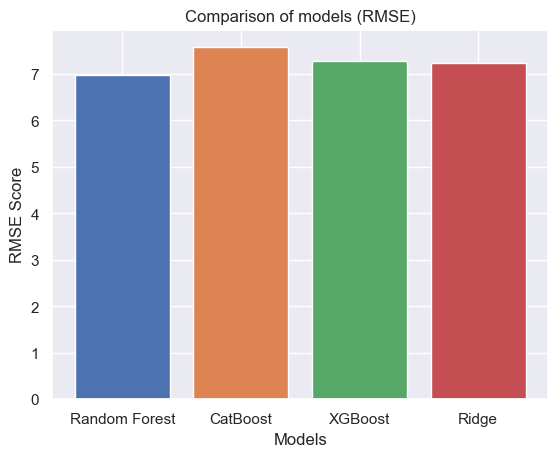

In [65]:
rmse_scores = pd.DataFrame({'Random Forest':rmse_rf,
                            'CatBoost':rmse_cat,
                            'XGBoost':rmse_xgb,
                            'Ridge':rmse_ridge},
                            index=[0])

for model_name, model in rmse_scores.items():
    plt.bar(model_name, model)
plt.title('Comparison of models (RMSE)');
plt.xlabel('Models');
plt.ylabel('RMSE Score');
plt.tight_layout;

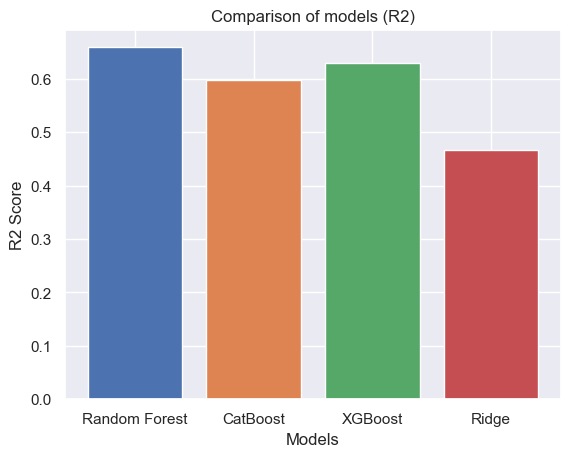

In [82]:
# Compare r2 score as well
r2_scores = pd.DataFrame({'Random Forest':r2_rf,
                            'CatBoost':r2_cat,
                            'XGBoost':r2_xgb,
                            'Ridge':r2_ridge},
                            index=[0])

for model_name, model in r2_scores.items():
    plt.bar(model_name, model)
plt.title('Comparison of models (R2)');
plt.xlabel('Models');
plt.ylabel('R2 Score');
plt.tight_layout;

### The best model therefore its the Random Forest Regressor which gives the lowest RMSE of 6.98 and the highest R2 Score of 0.66

### Now we will cross validate and see the respective scores for a better evaluation

In [67]:
cv_mean_squared_error = cross_val_score(grid_search_rf,
                                        X,
                                        y,
                                        cv=5,
                                        scoring='neg_mean_squared_error',
                                        n_jobs=-1,
                                        verbose=True)

cv_mean_squared_error

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.9s finished


array([-35.84161299, -54.9390912 , -40.0414212 , -47.39352052,
       -30.73919139])

In [68]:
np.mean(cv_mean_squared_error)

-41.79096745987435

In [69]:
np.sqrt(-np.mean(cv_mean_squared_error))

6.464593371579867

## Conclusion

The best model was Random Forest Regressor giving an root mean squared error of 6.98 and a cross validated root mean square error of 6.46